# 1교시

In [4]:
import numpy as np
import pandas as pd
import pydataset

In [5]:
mpg = pydataset.data('mpg')
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


# 1. 제조사 별로 묶기

In [7]:
mpg.groupby('manufacturer')

## 1-1. 'cty' 와 'hwy' 의 평균을 구하세요

In [9]:
mpg.groupby('manufacturer')['cty','hwy'].mean()

C:\Users\user\AppData\Local\Temp\ipykernel_12672\722182086.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mpg.groupby('manufacturer')['cty','hwy'].mean()


,cty,hwy
manufacturer,,
audi,17.611111,26.444444
chevrolet,15.000000,21.894737
dodge,13.135135,17.945946
ford,14.000000,19.360000
honda,24.444444,32.555556
hyundai,18.642857,26.857143
jeep,13.500000,17.625000
land rover,11.500000,16.500000
lincoln,11.333333,17.000000


# 2. 타이타닉 읽기

In [12]:
titanic = pydataset.data('titanic')
titanic

,class,age,sex,survived
1,1st class,adults,man,yes
2,1st class,adults,man,yes
3,1st class,adults,man,yes
4,1st class,adults,man,yes
5,1st class,adults,man,yes
...,...,...,...,...
1312,3rd class,child,women,no
1313,3rd class,child,women,no
1314,3rd class,child,women,no
1315,3rd class,child,women,no


## 2-1. 성별과 나이로 그룹을 짓고, 각 그룹별로 몇 명인지 구하세요

In [17]:
titanic.groupby(['age','sex']).size()

age     sex  
adults  man      805
        women    402
child   man       64
        women     45
dtype: int64

In [23]:
ti = titanic.groupby(['age','sex']).count()
ti

class  survived
age    sex                   
adults man      805       805
       women    402       402
child  man       64        64
       women     45        45

## 2-2. 위 그룹으로 그림을 그리세요

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='sex'>

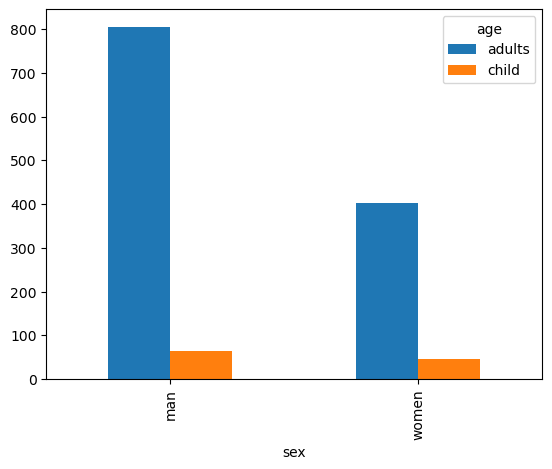

In [38]:
df=pd.DataFrame(titanic.groupby(['sex','age']).size().unstack(),
               index=pd.Index(['man','women'],name='sex'),
               columns=pd.Index(['adults','child'],name='age')
               )
df.plot.bar() 

<Axes: xlabel='sex', ylabel='num'>

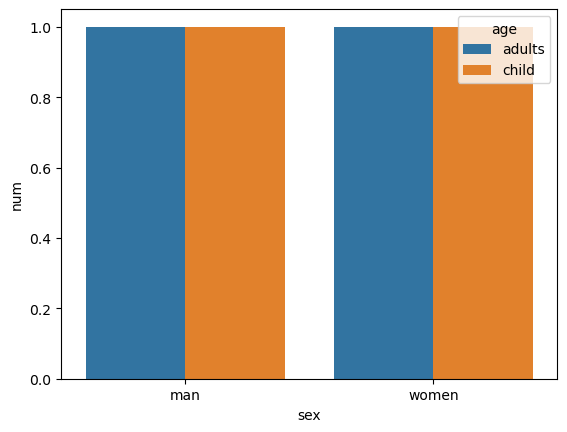

In [44]:
a = pd.DataFrame(ti.groupby(['sex','age']).size())
a.rename({0:'num'},axis=1,inplace=True)
a.reset_index(inplace=True)
sns.barplot(data=a, x='sex', y='num',hue='age') # 3차원까지만 그릴 수 있음. 

<Axes: xlabel='sex'>

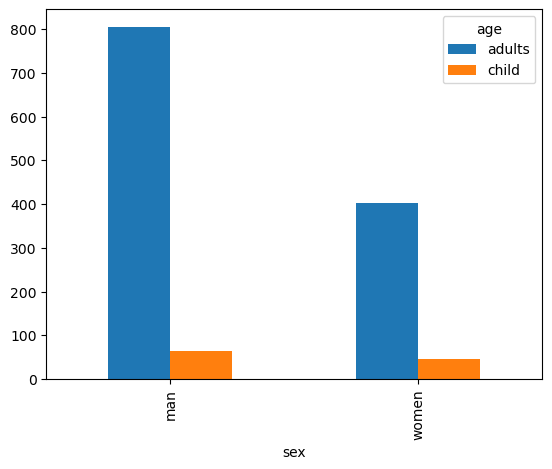

In [43]:
df=pd.DataFrame(titanic.groupby(['sex','age']).size().unstack())

df.plot(kind='bar')



# 3.

In [46]:
df1 = pd.DataFrame(np.arange(6).reshape(3, 2),
                   index = pd.Index(['a', 'b', 'c'], name = "lkey"),
                    columns=['one', 'two'])
df2 = pd.DataFrame(5 + np.arange(4).reshape(2, 2),
                   index = pd.Index(['a', 'c'], name = "rkey"),
                     columns=['three', 'four']) 

In [47]:
df1

,one,two
lkey,,
a,0,1
b,2,3
c,4,5


In [48]:
df2

,three,four
rkey,,
a,5,6
c,7,8


In [63]:
pd.concat([df1,df2],axis=1,keys=['lkey','rkey'])
# pd.concat([df1,df2],axis=1).reset_index=

lkey      rkey     
   one two three four
a    0   1   5.0  6.0
b    2   3   NaN  NaN
c    4   5   7.0  8.0

In [ ]:
df1.combine_first(df2)[['one','two','three','four']] 

In [ ]:
pd.merge(df1,df2,left_index=True,right_index=True,how='outer') 

In [ ]:
pd.merge(df1, df2, left_on='lkey',right_on='rkey', how='outer') 

# 4. 19th, 20th 가 들어간 century 컬럼을 추가하세요

In [67]:
CanPop = pydataset.data("CanPop")[:15]
CanPop

,year,population
1,1851,2.436
2,1861,3.230
3,1871,3.689
4,1881,4.325
5,1891,4.833
6,1901,5.371
7,1911,7.207
8,1921,8.788
9,1931,10.377
10,1941,11.507


In [72]:
CanPop['century'] = np.where(CanPop['year']<1900, '19th', '20th') 
CanPop

,year,population,century
1,1851,2.436,19th
2,1861,3.230,19th
3,1871,3.689,19th
4,1881,4.325,19th
5,1891,4.833,19th
6,1901,5.371,20th
7,1911,7.207,20th
8,1921,8.788,20th
9,1931,10.377,20th
10,1941,11.507,20th


## 4-1. 위 데이터프레임을 가지고 선그래프를 그리세요

<Axes: xlabel='year'>

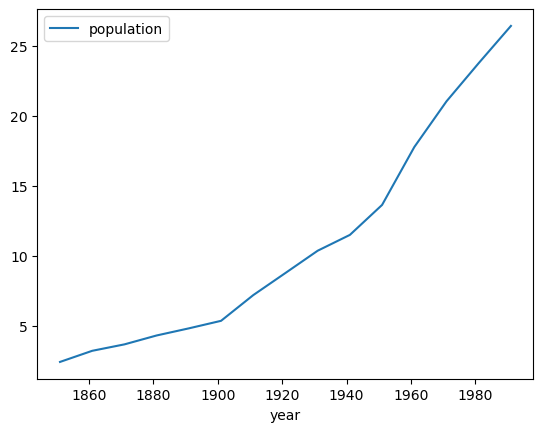

In [78]:
CanPop.plot(x='year') # y='population' , kind='line'

# 2교시 : 392p~

In [86]:
import random
random.seed(1111)
df=pd.DataFrame({'key1' : ['a','a','b','b','a'],
                 'key2' : ['one','two','one','two','one'],
                 'data1': np.random.randn(5),
                 'data2': np.random.randn(5)}) 
df

,key1,key2,data1,data2
0,a,one,0.605144,0.062787
1,a,two,-0.560148,0.001923
2,b,one,1.234509,0.906565
3,b,two,-0.600096,0.731190
4,a,one,0.257184,-0.649853


In [87]:
df.groupby('key1')['data1'] # 시리즈
df.groupby('key1')[['data1']] # 데이터프레임

In [88]:
list(df.groupby('key1')['data1'])

[('a',
  0    0.605144
  1   -0.560148
  4    0.257184
  Name: data1, dtype: float64),
 ('b',
  2    1.234509
  3   -0.600096
  Name: data1, dtype: float64)]

In [89]:
df.groupby(['key1','key2'])

In [90]:
list(df.groupby(['key1','key2']))

[(('a', 'one'),
    key1 key2     data1     data2
  0    a  one  0.605144  0.062787
  4    a  one  0.257184 -0.649853),
 (('a', 'two'),
    key1 key2     data1     data2
  1    a  two -0.560148  0.001923),
 (('b', 'one'),
    key1 key2     data1     data2
  2    b  one  1.234509  0.906565),
 (('b', 'two'),
    key1 key2     data1    data2
  3    b  two -0.600096  0.73119)]

In [94]:
df.groupby(['key1','key2'])[['data2']]
df.groupby(['key1','key2'])[['data2']].sum()

data2
key1 key2          
a    one  -0.587065
     two   0.001923
b    one   0.906565
     two   0.731190

In [92]:
list(df.groupby(['key1','key2'])[['data2']])

[(('a', 'one'),
        data2
  0  0.062787
  4 -0.649853),
 (('a', 'two'),
        data2
  1  0.001923),
 (('b', 'one'),
        data2
  2  0.906565),
 (('b', 'two'),
       data2
  3  0.73119)]

### 칼럼 이름 매핑하기

In [96]:
people = pd.DataFrame(np.random.randn(5, 5),
   ....:                       columns=['a', 'b', 'c', 'd', 'e'],
   ....:                       index=['Joe', 'Steve', 'Wes', 'Jim', 'Travis'])


In [97]:
people

,a,b,c,d,e
Joe,-0.780710,-0.110118,1.482631,0.192601,-0.613731
Steve,-1.104571,-1.423399,1.169709,0.586912,0.105555
Wes,-0.013192,0.303852,-0.495024,-0.360651,0.823662
Jim,0.333281,-0.233801,0.562320,-0.946194,2.430454
Travis,0.301900,-1.173647,0.448467,-0.614162,-2.018201


In [98]:
mapping = {"a":'red','b':'red','c':'blue','d':'blue','e':'red','f':'orange'}

In [99]:
people.groupby(mapping,axis=1)

In [101]:
list(people.groupby(mapping,axis=1))

[('blue',
                 c         d
  Joe     1.482631  0.192601
  Steve   1.169709  0.586912
  Wes    -0.495024 -0.360651
  Jim     0.562320 -0.946194
  Travis  0.448467 -0.614162),
 ('red',
                 a         b         e
  Joe    -0.780710 -0.110118 -0.613731
  Steve  -1.104571 -1.423399  0.105555
  Wes    -0.013192  0.303852  0.823662
  Jim     0.333281 -0.233801  2.430454
  Travis  0.301900 -1.173647 -2.018201)]

In [100]:
people.groupby(mapping,axis=1).sum()

,blue,red
Joe,1.675232,-1.504559
Steve,1.756621,-2.422416
Wes,-0.855675,1.114321
Jim,-0.383874,2.529933
Travis,-0.165696,-2.889949


In [102]:
map_series = pd.Series(mapping)
map_series

a       red
b       red
c      blue
d      blue
e       red
f    orange
dtype: object

In [103]:
people.groupby(map_series,axis=1).sum()

,blue,red
Joe,1.675232,-1.504559
Steve,1.756621,-2.422416
Wes,-0.855675,1.114321
Jim,-0.383874,2.529933
Travis,-0.165696,-2.889949


In [105]:
list(people.groupby(len)) # 알파벳의 갯수를 기준으로 그룹으로 묶기

[(3,
              a         b         c         d         e
  Joe -0.780710 -0.110118  1.482631  0.192601 -0.613731
  Wes -0.013192  0.303852 -0.495024 -0.360651  0.823662
  Jim  0.333281 -0.233801  0.562320 -0.946194  2.430454),
 (5,
                a         b         c         d         e
  Steve -1.104571 -1.423399  1.169709  0.586912  0.105555),
 (6,
               a         b         c         d         e
  Travis  0.3019 -1.173647  0.448467 -0.614162 -2.018201)]

In [106]:
people.groupby(len).sum()

,a,b,c,d,e
3,-0.460621,-0.040068,1.549927,-1.114244,2.640385
5,-1.104571,-1.423399,1.169709,0.586912,0.105555
6,0.301900,-1.173647,0.448467,-0.614162,-2.018201


In [107]:
columns = pd.MultiIndex.from_arrays([['US', 'US', 'US', 'JP', 'JP'],
   ....:                                     [1, 3, 5, 1, 3]],
   ....:                                     names=['cty', 'tenor']) 


In [109]:
hier_df = pd.DataFrame(np.random.randn(4,5),columns=columns)
hier_df

cty          US                            JP          
tenor         1         3         5         1         3
0     -0.081546  1.031346 -1.276641  0.109591 -1.523923
1      0.265724 -2.052828  0.372884 -0.843836 -0.037737
2      0.573539  1.468948  0.377099 -1.057959 -1.101183
3      0.562033  1.537543  0.008746  1.220015  2.264814

In [111]:
hier_df.groupby(level='cty',axis=1)

In [112]:
hier_df.groupby(level='cty',axis=1).sum()

cty,JP,US
0,-1.414332,-0.326841
1,-0.881573,-1.414220
2,-2.159142,2.419585
3,3.484829,2.108321


In [113]:
hier_df.groupby(level='tenor',axis=1).sum()

tenor,1,3,5
0,0.028045,-0.492578,-1.276641
1,-0.578112,-2.090565,0.372884
2,-0.484420,0.367765,0.377099
3,1.782048,3.802356,0.008746


In [114]:
df

,key1,key2,data1,data2
0,a,one,0.605144,0.062787
1,a,two,-0.560148,0.001923
2,b,one,1.234509,0.906565
3,b,two,-0.600096,0.731190
4,a,one,0.257184,-0.649853


In [115]:
g = df.groupby('key1')
list(g)

[('a',
    key1 key2     data1     data2
  0    a  one  0.605144  0.062787
  1    a  two -0.560148  0.001923
  4    a  one  0.257184 -0.649853),
 ('b',
    key1 key2     data1     data2
  2    b  one  1.234509  0.906565
  3    b  two -0.600096  0.731190)]

In [116]:
g.sum()

C:\Users\user\AppData\Local\Temp\ipykernel_12672\1197020669.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  g.sum()


,data1,data2
key1,,
a,0.302180,-0.585142
b,0.634413,1.637755


In [124]:
g.quantile(0.9)

g.quantile(0.9)[['data1']]

g['data1'].quantile(0.9)



C:\Users\user\AppData\Local\Temp\ipykernel_12672\1921628572.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.quantile is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  g.quantile(0.9)
C:\Users\user\AppData\Local\Temp\ipykernel_12672\1921628572.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.quantile is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  g.quantile(0.9)[['data1']]


key1
a    0.535552
b    1.051048
Name: data1, dtype: float64

In [126]:
df

,key1,key2,data1,data2
0,a,one,0.605144,0.062787
1,a,two,-0.560148,0.001923
2,b,one,1.234509,0.906565
3,b,two,-0.600096,0.731190
4,a,one,0.257184,-0.649853


In [127]:
df['data1'].max() - df['data1'].min()

1.8346050330167145

In [129]:
df['data1'].max()

1.2345088782305118

In [128]:
df['data1'].min()

-0.6000961547862028

# 3교시

In [131]:
def min_max(x):
      return x.max() - x.min()

In [139]:
df1 = df.iloc[:,[2,3]].copy()
df1

,data1,data2
0,0.605144,0.062787
1,-0.560148,0.001923
2,1.234509,0.906565
3,-0.600096,0.731190
4,0.257184,-0.649853


In [141]:
df1.apply(min_max)

data1    1.834605
data2    1.556418
dtype: float64

In [142]:
df

,key1,key2,data1,data2
0,a,one,0.605144,0.062787
1,a,two,-0.560148,0.001923
2,b,one,1.234509,0.906565
3,b,two,-0.600096,0.731190
4,a,one,0.257184,-0.649853


In [143]:
list(g)

[('a',
    key1 key2     data1     data2
  0    a  one  0.605144  0.062787
  1    a  two -0.560148  0.001923
  4    a  one  0.257184 -0.649853),
 ('b',
    key1 key2     data1     data2
  2    b  one  1.234509  0.906565
  3    b  two -0.600096  0.731190)]

In [145]:
g.agg(min_max) # 사용자 정의함수를 바로 사용하려면

C:\Users\user\AppData\Local\Temp\ipykernel_12672\3461827451.py:1: FutureWarning: ['key2'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  g.agg(min_max) # 사용자 정의함수를 바로 사용하려면


,data1,data2
key1,,
a,1.165292,0.712640
b,1.834605,0.175375


In [149]:
def peak_to_peak(arr):
      return arr.max() - arr.min()

In [150]:
df.groupby('key1').agg(peak_to_peak)

C:\Users\user\AppData\Local\Temp\ipykernel_12672\3330658277.py:1: FutureWarning: ['key2'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df.groupby('key1').agg(peak_to_peak)


,data1,data2
key1,,
a,1.165292,0.712640
b,1.834605,0.175375


In [151]:
df.groupby('key1')[['data1','data2']].agg(peak_to_peak)

,data1,data2
key1,,
a,1.165292,0.712640
b,1.834605,0.175375


In [152]:
df.groupby('key1')[['data1','data2']].apply(peak_to_peak)

,data1,data2
key1,,
a,1.165292,0.712640
b,1.834605,0.175375


In [153]:
tips = pydataset.data('tips')
tips.head(5)

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4


In [155]:
tip_pct = (tips['total_bill'] - tips['tip']) / (tips['tip'])

In [157]:
tips['tip_pct'] = tip_pct

In [158]:
tips

,total_bill,tip,sex,smoker,day,time,size,tip_pct
1,16.99,1.01,Female,No,Sun,Dinner,2,15.821782
2,10.34,1.66,Male,No,Sun,Dinner,3,5.228916
3,21.01,3.50,Male,No,Sun,Dinner,3,5.002857
4,23.68,3.31,Male,No,Sun,Dinner,2,6.154079
5,24.59,3.61,Female,No,Sun,Dinner,4,5.811634
...,...,...,...,...,...,...,...,...
240,29.03,5.92,Male,No,Sat,Dinner,3,3.903716
241,27.18,2.00,Female,Yes,Sat,Dinner,2,12.590000
242,22.67,2.00,Male,Yes,Sat,Dinner,2,10.335000
243,17.82,1.75,Male,No,Sat,Dinner,2,9.182857


In [159]:
tips.groupby(['day','smoker'])

In [161]:
# list(tips.groupby(['day','smoker']))

In [162]:
tips.groupby(['day','smoker']).mean()

C:\Users\user\AppData\Local\Temp\ipykernel_12672\1092611362.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tips.groupby(['day','smoker']).mean()


total_bill       tip      size   tip_pct
day  smoker                                          
Fri  No       18.420000  2.812500  2.250000  5.764762
     Yes      16.813333  2.714000  2.066667  5.206909
Sat  No       19.661778  3.102889  2.555556  5.785127
     Yes      21.276667  2.875476  2.476190  7.336102
Sun  No       20.506667  3.167895  2.929825  5.808689
     Yes      24.120000  3.516842  2.578947  6.715231
Thur No       17.113111  2.673778  2.488889  5.658424
     Yes      19.190588  3.030000  2.352941  5.471532

### 그룹별 컬럼마다 다른 함수 적용하기

In [164]:
grouped = tips.groupby(['day','smoker'])

In [165]:
grouped['tip_pct'].mean()

day   smoker
Fri   No        5.764762
      Yes       5.206909
Sat   No        5.785127
      Yes       7.336102
Sun   No        5.808689
      Yes       6.715231
Thur  No        5.658424
      Yes       5.471532
Name: tip_pct, dtype: float64

In [166]:
grouped['tip_pct'].agg('mean')

day   smoker
Fri   No        5.764762
      Yes       5.206909
Sat   No        5.785127
      Yes       7.336102
Sun   No        5.808689
      Yes       6.715231
Thur  No        5.658424
      Yes       5.471532
Name: tip_pct, dtype: float64

In [167]:
grouped['tip_pct'].apply('mean')

day   smoker
Fri   No        5.764762
      Yes       5.206909
Sat   No        5.785127
      Yes       7.336102
Sun   No        5.808689
      Yes       6.715231
Thur  No        5.658424
      Yes       5.471532
Name: tip_pct, dtype: float64

In [168]:
grouped.agg({'tip':np.max,'size':'sum'})

tip  size
day  smoker             
Fri  No       3.50     9
     Yes      4.73    31
Sat  No       9.00   115
     Yes     10.00   104
Sun  No       6.00   167
     Yes      6.50    49
Thur No       6.70   112
     Yes      5.00    40

In [170]:
# apply 는 단일함수에만 적용된다
grouped.apply({'tip':np.max,'size':'sum'}) 

TypeError: unhashable type: 'dict'

### 2가지 이상의 집계함수를 적용 할 때

In [174]:
grouped['tip_pct'].mean()
grouped['tip_pct'].sum()
grouped['tip_pct'].max()
grouped['tip_pct'].agg(['mean','sum','max',peak_to_peak])

mean         sum        max  peak_to_peak
day  smoker                                               
Fri  No      5.764762   23.059048   7.306667      2.980000
     Yes     5.206909   78.103631   8.656667      5.861318
Sat  No      5.785127  260.330695  16.606667     14.181888
     Yes     7.336102  308.116285  27.059829     24.989829
Sun  No      5.808689  331.095282  15.821782     12.864090
     Yes     6.715231  127.589397  14.230000     13.822233
Thur No      5.658424  254.629074  12.705882      9.950882
     Yes     5.471532   93.016045  10.109375      6.964375

In [177]:
# 이름 바꾸기
grouped['tip_pct'].agg([('평균','mean'),('합계','sum'),'max',peak_to_peak])

평균          합계        max  \
day  smoker                                    
Fri  No      5.764762   23.059048   7.306667   
     Yes     5.206909   78.103631   8.656667   
Sat  No      5.785127  260.330695  16.606667   
     Yes     7.336102  308.116285  27.059829   
Sun  No      5.808689  331.095282  15.821782   
     Yes     6.715231  127.589397  14.230000   
Thur No      5.658424  254.629074  12.705882   
     Yes     5.471532   93.016045  10.109375   

             <function peak_to_peak at 0x000001F6E09B7EB0>  
day  smoker                                                 
Fri  No                                           2.980000  
     Yes                                          5.861318  
Sat  No                                          14.181888  
     Yes                                         24.989829  
Sun  No                                          12.864090  
     Yes                                         13.822233  
Thur No                                           9.950882  
     Yes                                          6.964375

In [178]:
functions = ['mean','sum','max',peak_to_peak]
grouped['tip_pct'].agg(functions)

mean         sum        max  peak_to_peak
day  smoker                                               
Fri  No      5.764762   23.059048   7.306667      2.980000
     Yes     5.206909   78.103631   8.656667      5.861318
Sat  No      5.785127  260.330695  16.606667     14.181888
     Yes     7.336102  308.116285  27.059829     24.989829
Sun  No      5.808689  331.095282  15.821782     12.864090
     Yes     6.715231  127.589397  14.230000     13.822233
Thur No      5.658424  254.629074  12.705882      9.950882
     Yes     5.471532   93.016045  10.109375      6.964375

In [179]:
grouped[['tip_pct','total_bill']].agg(functions)

tip_pct                                     total_bill           \
                 mean         sum        max peak_to_peak       mean      sum   
day  smoker                                                                     
Fri  No      5.764762   23.059048   7.306667     2.980000  18.420000    73.68   
     Yes     5.206909   78.103631   8.656667     5.861318  16.813333   252.20   
Sat  No      5.785127  260.330695  16.606667    14.181888  19.661778   884.78   
     Yes     7.336102  308.116285  27.059829    24.989829  21.276667   893.62   
Sun  No      5.808689  331.095282  15.821782    12.864090  20.506667  1168.88   
     Yes     6.715231  127.589397  14.230000    13.822233  24.120000   458.28   
Thur No      5.658424  254.629074  12.705882     9.950882  17.113111   770.09   
     Yes     5.471532   93.016045  10.109375     6.964375  19.190588   326.24   

                                 
               max peak_to_peak  
day  smoker                      
Fri  No      22.75        10.29  
     Yes     40.17        34.42  
Sat  No      48.33        41.08  
     Yes     50.81        47.74  
Sun  No      48.17        39.40  
     Yes     45.35        38.10  
Thur No      41.19        33.68  
     Yes     43.11        32.77

In [181]:
tips.sort_values('day')

,total_bill,tip,sex,smoker,day,time,size,tip_pct
97,27.28,4.00,Male,Yes,Fri,Dinner,2,5.820000
102,15.38,3.00,Female,Yes,Fri,Dinner,2,4.126667
99,21.01,3.00,Male,Yes,Fri,Dinner,2,6.003333
98,12.03,1.50,Male,Yes,Fri,Dinner,2,7.020000
96,40.17,4.73,Male,Yes,Fri,Dinner,4,7.492600
...,...,...,...,...,...,...,...,...
133,11.17,1.50,Female,No,Thur,Lunch,2,6.446667
132,20.27,2.83,Female,No,Thur,Lunch,2,6.162544
131,19.08,1.50,Male,No,Thur,Lunch,2,11.720000
129,11.38,2.00,Female,No,Thur,Lunch,2,4.690000


In [193]:
# 상위 5개의 데이터프레임 반환하기
def top(df, n, column):
      return df.sort_values(by=column,ascending = False)[:n]
      

In [197]:
top(tips, 10,column='tip')

,total_bill,tip,sex,smoker,day,time,size,tip_pct
171,50.81,10.00,Male,Yes,Sat,Dinner,3,4.081000
213,48.33,9.00,Male,No,Sat,Dinner,4,4.370000
24,39.42,7.58,Male,No,Sat,Dinner,4,4.200528
60,48.27,6.73,Male,No,Sat,Dinner,4,6.172363
142,34.30,6.70,Male,No,Thur,Lunch,6,4.119403
215,28.17,6.50,Female,Yes,Sat,Dinner,3,3.333846
184,23.17,6.50,Male,Yes,Sun,Dinner,4,2.564615
48,32.40,6.00,Male,No,Sun,Dinner,4,4.400000
240,29.03,5.92,Male,No,Sat,Dinner,3,3.903716
89,24.71,5.85,Male,No,Thur,Lunch,2,3.223932


In [200]:
# apply를 써서 사용자 정의 함수에 접근하려면 해당 함수의 변수들이 디폴트값으로 정해져 있어야됨 
tips.groupby('sex').apply(top(tips, 10,column='tip'))

TypeError: unhashable type: 'DataFrame'

In [210]:
tips.groupby('sex').apply(top,n=5,column='tip')

total_bill    tip     sex smoker   day    time  size   tip_pct
sex                                                                       
Female 215       28.17   6.50  Female    Yes   Sat  Dinner     3  3.333846
       53        34.81   5.20  Female     No   Sun  Dinner     4  5.694231
       86        34.83   5.17  Female     No  Thur   Lunch     4  5.736944
       156       29.85   5.14  Female     No   Sun  Dinner     5  4.807393
       12        35.26   5.00  Female     No   Sun  Dinner     4  6.052000
Male   171       50.81  10.00    Male    Yes   Sat  Dinner     3  4.081000
       213       48.33   9.00    Male     No   Sat  Dinner     4  4.370000
       24        39.42   7.58    Male     No   Sat  Dinner     4  4.200528
       60        48.27   6.73    Male     No   Sat  Dinner     4  6.172363
       142       34.30   6.70    Male     No  Thur   Lunch     6  4.119403

In [212]:
# 그룹 색인 생략하기 ( group_keys=False )
tips.groupby('sex',group_keys=False).apply(top,n=5,column='tip')

,total_bill,tip,sex,smoker,day,time,size,tip_pct
215,28.17,6.50,Female,Yes,Sat,Dinner,3,3.333846
53,34.81,5.20,Female,No,Sun,Dinner,4,5.694231
86,34.83,5.17,Female,No,Thur,Lunch,4,5.736944
156,29.85,5.14,Female,No,Sun,Dinner,5,4.807393
12,35.26,5.00,Female,No,Sun,Dinner,4,6.052000
171,50.81,10.00,Male,Yes,Sat,Dinner,3,4.081000
213,48.33,9.00,Male,No,Sat,Dinner,4,4.370000
24,39.42,7.58,Male,No,Sat,Dinner,4,4.200528
60,48.27,6.73,Male,No,Sat,Dinner,4,6.172363
142,34.30,6.70,Male,No,Thur,Lunch,6,4.119403


# 5교시

In [214]:
frame = pd.DataFrame({'data1':np.random.randn(1000),'data2':np.random.randn(1000)})
frame

,data1,data2
0,-0.601913,-1.456181
1,-0.022904,-0.233856
2,-1.626177,0.151034
3,-0.549208,0.988364
4,-0.699921,-0.279534
...,...,...
995,-0.248831,-0.631332
996,-1.319165,2.336438
997,0.274937,-1.156855
998,-0.282334,0.756286


In [215]:
### 90%지점의 수?

In [216]:
frame.quantile(0.9)

data1    1.231563
data2    1.303500
Name: 0.9, dtype: float64

In [218]:
data1 칼럼 기준을 4등분하기

SyntaxError: invalid decimal literal (3957463002.py, line 1)

In [219]:
pd.cut(frame['data1'],4)

0      (-1.52, 0.0888]
1      (-1.52, 0.0888]
2      (-3.135, -1.52]
3      (-1.52, 0.0888]
4      (-1.52, 0.0888]
            ...       
995    (-1.52, 0.0888]
996    (-1.52, 0.0888]
997    (0.0888, 1.698]
998    (-1.52, 0.0888]
999    (-1.52, 0.0888]
Name: data1, Length: 1000, dtype: category
Categories (4, interval[float64, right]): [(-3.135, -1.52] < (-1.52, 0.0888] < (0.0888, 1.698] < (1.698, 3.306]]

In [220]:
pd.cut(frame['data1'],4,labels = ['a','b','c','d'])

0      b
1      b
2      a
3      b
4      b
      ..
995    b
996    b
997    c
998    b
999    b
Name: data1, Length: 1000, dtype: category
Categories (4, object): ['a' < 'b' < 'c' < 'd']

In [221]:
frame['grade'] = pd.cut(frame['data1'],4,labels = ['a','b','c','d'])
frame[:5]

,data1,data2,grade
0,-0.601913,-1.456181,b
1,-0.022904,-0.233856,b
2,-1.626177,0.151034,a
3,-0.549208,0.988364,b
4,-0.699921,-0.279534,b


In [222]:
frame.groupby('grade').mean()

,data1,data2
grade,,
a,-1.979550,-0.162945
b,-0.595498,-0.072208
c,0.703772,-0.039389
d,2.064087,0.092632


In [225]:
qu = pd.qcut(frame.data1,10)
qu

0       (-0.887, -0.562]
1       (-0.0385, 0.208]
2        (-3.13, -1.298]
3       (-0.562, -0.282]
4       (-0.887, -0.562]
             ...        
995    (-0.282, -0.0385]
996      (-3.13, -1.298]
997       (0.208, 0.483]
998     (-0.562, -0.282]
999     (-1.298, -0.887]
Name: data1, Length: 1000, dtype: category
Categories (10, interval[float64, right]): [(-3.13, -1.298] < (-1.298, -0.887] < (-0.887, -0.562] < (-0.562, -0.282] ... (0.208, 0.483] < (0.483, 0.788] < (0.788, 1.232] < (1.232, 3.306]]

### 그룹에 따른 값으로 결측치 채우기

In [227]:
states = ['Ohio', 'New York', 'Vermont', 'Florida',
   ....:           'Oregon', 'Nevada', 'California', 'Idaho'] 
states

['Ohio',
 'New York',
 'Vermont',
 'Florida',
 'Oregon',
 'Nevada',
 'California',
 'Idaho']

In [228]:
group_key = ['East'] * 4 + ['West'] * 4
data = pd.Series(np.random.randn(8),index=states)
data

Ohio          0.462527
New York     -1.640480
Vermont      -0.202051
Florida      -1.213733
Oregon       -1.341743
Nevada       -1.674939
California   -1.137153
Idaho         0.229280
dtype: float64

In [229]:
data['Vermont'] = np.nan

In [230]:
data

Ohio          0.462527
New York     -1.640480
Vermont            NaN
Florida      -1.213733
Oregon       -1.341743
Nevada       -1.674939
California   -1.137153
Idaho         0.229280
dtype: float64

In [232]:
data[['Nevada','Idaho']] = np.nan
data

Ohio          0.462527
New York     -1.640480
Vermont            NaN
Florida      -1.213733
Oregon       -1.341743
Nevada             NaN
California   -1.137153
Idaho              NaN
dtype: float64

In [233]:
group_key

['East', 'East', 'East', 'East', 'West', 'West', 'West', 'West']

In [234]:
data.groupby(group_key).mean()

East   -0.797228
West   -1.239448
dtype: float64

In [236]:
f = lambda x: x.fillna(x.mean())
data.groupby(group_key).apply(f)


C:\Users\user\AppData\Local\Temp\ipykernel_12672\2495933247.py:2: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  data.groupby(group_key).apply(f)


Ohio          0.462527
New York     -1.640480
Vermont      -0.797228
Florida      -1.213733
Oregon       -1.341743
Nevada       -1.239448
California   -1.137153
Idaho        -1.239448
dtype: float64

### 피벗테이블과 교차일람표 418p~

In [239]:
tips.pivot_table(index=['day','smoker'])

C:\Users\user\AppData\Local\Temp\ipykernel_12672\2998675722.py:1: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  tips.pivot_table(index=['day','smoker'])


size       tip   tip_pct  total_bill
day  smoker                                          
Fri  No      2.250000  2.812500  5.764762   18.420000
     Yes     2.066667  2.714000  5.206909   16.813333
Sat  No      2.555556  3.102889  5.785127   19.661778
     Yes     2.476190  2.875476  7.336102   21.276667
Sun  No      2.929825  3.167895  5.808689   20.506667
     Yes     2.578947  3.516842  6.715231   24.120000
Thur No      2.488889  2.673778  5.658424   17.113111
     Yes     2.352941  3.030000  5.471532   19.190588

In [240]:
tips.pivot_table(['tip_pct','size'],index=['time','day'],columns='smoker')

size             tip_pct          
smoker             No       Yes        No       Yes
time   day                                         
Dinner Fri   2.000000  2.222222  6.244127  5.578291
       Sat   2.555556  2.476190  5.785127  7.336102
       Sun   2.929825  2.578947  5.808689  6.715231
       Thur  2.000000       NaN  5.260000       NaN
Lunch  Fri   3.000000  1.833333  4.326667  4.649836
       Thur  2.500000  2.352941  5.667479  5.471532

In [241]:
tips.pivot_table(['tip_pct','size'],index=['time','day'],columns='smoker',margins=True)

size                       tip_pct                    
smoker             No       Yes       All        No       Yes       All
time   day                                                             
Dinner Fri   2.000000  2.222222  2.166667  6.244127  5.578291  5.744750
       Sat   2.555556  2.476190  2.517241  5.785127  7.336102  6.533873
       Sun   2.929825  2.578947  2.842105  5.808689  6.715231  6.035325
       Thur  2.000000       NaN  2.000000  5.260000       NaN  5.260000
Lunch  Fri   3.000000  1.833333  2.000000  4.326667  4.649836  4.603669
       Thur  2.500000  2.352941  2.459016  5.667479  5.471532  5.612871
All          2.668874  2.408602  2.569672  5.755723  6.525004  6.048932

In [242]:
tips.pivot_table(['tip_pct','size'],index=['time','day'],columns='smoker',aggfunc='max',margins=True)

size             tip_pct                      
smoker        No  Yes All         No        Yes        All
time   day                                                
Dinner Fri   2.0  4.0   4   7.306667   8.656667   8.656667
       Sat   4.0  5.0   5  16.606667  27.059829  27.059829
       Sun   6.0  5.0   6  15.821782  14.230000  15.821782
       Thur  2.0  NaN   2   5.260000        NaN   5.260000
Lunch  Fri   3.0  2.0   3   4.326667   7.493671   7.493671
       Thur  6.0  4.0   6  12.705882  10.109375  12.705882
All          6.0  5.0   6  16.606667  27.059829  27.059829

# 6교시

In [244]:
tips.pivot_table('tip_pct',index = ['time','smoker'],columns = 'day', aggfunc= len, margins = True
      )

day             Fri   Sat   Sun  Thur  All
time   smoker                             
Dinner No       3.0  45.0  57.0   1.0  106
       Yes      9.0  42.0  19.0   NaN   70
Lunch  No       1.0   NaN   NaN  44.0   45
       Yes      6.0   NaN   NaN  17.0   23
All            19.0  87.0  76.0  62.0  244

In [245]:
tips.pivot_table('tip_pct',index = ['time','smoker'],columns = 'day', aggfunc= lambda x: x.max() - x.min(), margins = True
      )

day                 Fri        Sat        Sun      Thur        All
time   smoker                                                     
Dinner No      1.880952  14.181888  12.864090  0.000000  14.181888
       Yes     5.861318  24.989829  13.822233       NaN  26.652062
Lunch  No      0.000000        NaN        NaN  9.950882   9.950882
       Yes     4.637349        NaN        NaN  6.964375   7.253053
All            5.861318  24.989829  15.414015  9.950882  26.652062

### 교차일람표

In [247]:
pd.crosstab(tips.time, tips.smoker, margins=True)

smoker,No,Yes,All
time,,,
Dinner,106,70,176
Lunch,45,23,68
All,151,93,244


In [248]:
tips.tip_pct

1      15.821782
2       5.228916
3       5.002857
4       6.154079
5       5.811634
         ...    
240     3.903716
241    12.590000
242    10.335000
243     9.182857
244     5.260000
Name: tip_pct, Length: 244, dtype: float64

In [250]:
pd.crosstab([tips.time, tips.day],tips.smoker, margins=True)

smoker        No  Yes  All
time   day                
Dinner Fri     3    9   12
       Sat    45   42   87
       Sun    57   19   76
       Thur    1    0    1
Lunch  Fri     1    6    7
       Thur   44   17   61
All          151   93  244

### 시계열 423p ~

In [252]:
# import datetime.datetime 
from datetime import datetime

In [253]:
now = datetime.now()
now

datetime.datetime(2023, 4, 10, 15, 35, 32, 500331)

In [257]:
now.year, now.month, now.day

(2023, 4, 10)

### datetime -> 문자열로 변환하기

In [265]:
stamp = datetime(2023,4,10)
stamp

datetime.datetime(2023, 4, 10, 0, 0)

In [267]:
stamp.strftime('%Y-%m-%d')

'2023-04-10'

In [266]:
datetime(2023,4,10) - datetime(2023,2,10)

datetime.timedelta(days=59)

### 문자열을 -> datetime으로 변환하기 

In [270]:
# 방법 1
datetime.strptime('2023/02/09', '%Y/%m/%d')

value = "2023/02/09"

datetime.strptime(value, "%Y/%m/%d")

In [271]:
# 방법 2 : parse() 메서드 사용하기 
from dateutil.parser import parse

In [272]:
parse("2023/02/09")

datetime.datetime(2023, 2, 9, 0, 0)

In [273]:
parse("2023/02-09")

datetime.datetime(2023, 2, 9, 0, 0)

In [274]:
parse("2023-02-09")

datetime.datetime(2023, 2, 9, 0, 0)

In [275]:
parse("20230209")

datetime.datetime(2023, 2, 9, 0, 0)

In [276]:
parse('Jan 31, 1997 10:45 PM')

datetime.datetime(1997, 1, 31, 22, 45)

In [277]:
parse('Jan 31, 1997 1045 PM')

datetime.datetime(1997, 1, 31, 22, 45)

In [278]:
parse('Jan 31 1997 1045 PM')

datetime.datetime(1997, 1, 31, 22, 45)

In [279]:
parse("02/09/2023", dayfirst = True) # 일/월/년도

datetime.datetime(2023, 9, 2, 0, 0)

In [280]:
# 방법 3 pd.to_datetime()

In [281]:
pd.to_datetime('2023/02/09')

Timestamp('2023-02-09 00:00:00')

In [282]:
pd.to_datetime(["2023/02/09", "2023/02/10"])

DatetimeIndex(['2023-02-09', '2023-02-10'], dtype='datetime64[ns]', freq=None)